1. Crear un entorno de anaconda con los paquetes que considere necesarios.
2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validaci ́on y pruebas(20 %).
3. Analisis exploratorio de datos: Para cada variable en el dataset calcular(usando numpy o pandas): media, valor maximo, valor mınimo, rango, desviacion estandar

In [ ]:
import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

# Cargar dataset a una variable
dataset = np.load("proyecto_training_data.npy")

# Separar dataset en 2 nuevos datasets 80% y 20%
split_idx = int(len(dataset) * 0.8)
train_data = dataset[:split_idx]
test_data = dataset[split_idx:]

# Calcular media, max, min, rango y desviacion estandar
value_means = np.mean(train_data, axis=0)
value_max = np.max(train_data, axis=0)
value_min = np.min(train_data, axis=0)
value_range = np.ptp(train_data, axis=0)
value_deviation = np.std(train_data, axis=0)
#print(data)

4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Cargar dataset a una variable
dataset = np.load("proyecto_training_data.npy")

# Convertir el ndarray a un DataFrame
dataframe = pd.DataFrame(dataset)

# Mostrar el histograma de la columna 0
sns.histplot(data=dataframe, x=0, kde=True)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset a una variable
dataset = np.load("proyecto_training_data.npy")

# Convertir el ndarray a un DataFrame
dataframe = pd.DataFrame(dataset)

# Crear un ciclo para generar histogramas por cada columna
for i in range(6):
    # Obtener el nombre de la columna en la iteración actual
    columna = dataframe.columns[i]
    
    # Crear el histograma utilizando Seaborn
    sns.histplot(data=dataframe, x=columna, kde=True)
    
    # Agregar etiquetas y título
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title('Histograma de la columna: {}'.format(columna))
    
    # Mostrar el histograma
    plt.show()
 


5. Para cada variable independiente x :
- Calcular el coeficiente de correlaci ́on entre x y y.
- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlaci ́on y colocarlo como parte del t ́ıtulo de la gr ́afica.
- Basado en la gr afica y el coeficiente de correlaci ́on de cada par x,y elegir las 2 variables con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion entre dicha variable y la variable dependiente.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset a una variable
dataset = np.load("proyecto_training_data.npy")

# Convertir el ndarray a un DataFrame
dataframe_original = pd.DataFrame(dataset)

# Separar el dataframe original en 3 nuevos dataframes con X y Y
dataframe1 = dataframe_original[[1, 0]]
dataframe2 = dataframe_original[[3, 2]]
dataframe3 = dataframe_original[[5, 4]]

# Calculando los coeficientes de correlacion
coefficient1 = dataframe1.corr().iloc[0, 1]
coefficient2 = dataframe2.corr().iloc[0, 1]
coefficient3 = dataframe3.corr().iloc[0, 1]

# Mostrar los coeficientes de correlacion
print("El coeficiente de correlacion del primer arreglo es", coefficient1)
print("El coeficiente de correlacion del segundo arreglo es", coefficient2)
print("El coeficiente de correlacion del tercer arreglo es", coefficient3)


# Extraer los ejes del dataframe a arreglos
x = dataframe_original[1]
y = dataframe_original[0]

# Crear grafica
plt.scatter(x, y)

# Agregar etiquetas y titulo
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title(f'Coeficiente de correlacion: {coefficient1:.3f}')

# Mostrar la grafica
plt.show()

# Extraer los ejes del dataframe a arreglos
x = dataframe_original[3]
y = dataframe_original[2]

# Crear grafica
plt.scatter(x, y)

# Agregar etiquetas y titulo
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title(f'Coeficiente de correlacion: {coefficient2:.3f}')

# Mostrar la grafica
plt.show()

# Extraer los ejes del dataframe a arreglos
x = dataframe_original[5]
y = dataframe_original[4]

# Crear grafica
plt.scatter(x, y)

# Agregar etiquetas y titulo
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title(f'Coeficiente de correlacion: {coefficient3:.3f}')

# Mostrar la grafica
plt.show()

# Encontrar el par con mayor potencial predictico
max_coefficient = max(coefficient1, coefficient2, coefficient3)
print(f'El maximo coeficiente encontrado es: {max_coefficient:.3f}')


6. Crear una funci ́on para entrenar un modelo de regresi ́on lineal de una variable y = β0 + β1 ∗ x. La funci ́on recibe como argumentos:
- 6.1 Vector con la variable independiente x,
- 6.2 Vector con la variable dependiente y,
- 6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
- 6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos imprimir a trav ́es de print: el nu ́mero de iteraci ́on, el error del modelo en esa itera- ci ́on, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.
- 6.5 escalar α(learning rate): es usado como parte de la expresi ́on matem ́atica para actualizar en cada iteraci ́on los par ́ametros del modelo.

[ 7.  6.  7. ... 79. 64. 58.] [208500. 181500. 223500. ...   2009.   2008.   2000.]


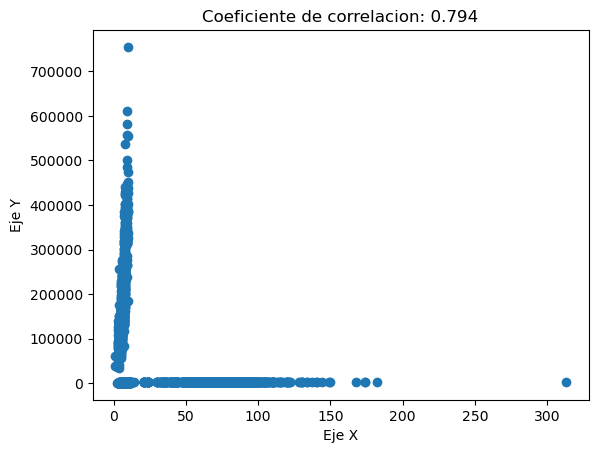

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funcion que retorna el modelo lineal
def calcular_modelo(b1,b0,x):
    return b1*x+b0

# Funcion que calcula el error cuadrático medio entre el dato original (y)y el dato generado por el modelo (y_)
def calcular_error(y,y_):

    N = y.shape[0]
    error = np.sum((y-y_)**2)/N
    return error

# Funcion para calcular el gradiente descendente para minimizar el error cuadrático medio
def gradiente_descendente(b1_, b0_, alpha, x, y):

    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "b1" y "b0"
    db1 = -(2/N)*np.sum(x*(y-(b1_*x+b0_)))
    db0 = -(2/N)*np.sum(y-(b1_*x+b0_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    b1 = b1_ - alpha*db1
    b0 = b0_ - alpha*db0

    return b1, b0

b1 = np.random.randn(1)[0]
b0 = np.random.randn(1)[0]


# Cargar dataset a una variable
dataset = np.load("proyecto_training_data.npy")

# Separar dataset en 2 nuevos datasets 80% y 20%
split_idx = int(len(dataset) * 0.8)
train_data = dataset[:split_idx]
test_data = dataset[split_idx:]

# Convertir los 3 datasets a 1 y guardarlo en arrays
training_dataframe = pd.DataFrame(train_data)
x = np.hstack((training_dataframe[1].values, training_dataframe[3].values, training_dataframe[5].values))
y = np.hstack((training_dataframe[0].values, training_dataframe[2].values, training_dataframe[4].values))
print(x,y)

# Calculando los coeficientes de correlacion
coefficient = training_dataframe.corr().iloc[0, 1]

# Crear grafica
plt.scatter(x, y)

# Agregar etiquetas y titulo
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title(f'Coeficiente de correlacion: {coefficient:.3f}')

# Mostrar la grafica
plt.show()


